### week 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
n=100


In [3]:
start_date=pd.to_datetime('today')-pd.Timedelta(days=180)
end_date=pd.to_datetime('today')+pd.Timedelta(days=180)

In [4]:
tasks = {
    'Task ID': range(1, n + 1),
    'Task Name': [f'Task {i}' for i in range(1, n + 1)],
    'Description': ['Description of task ' + str(i) for i in range(1, n + 1)],
    'Priority': np.random.choice(['High', 'Medium', 'Low'], size=n),
    'Deadline': pd.to_datetime(np.random.choice(pd.date_range(start_date, end_date, freq='D'), size=n)), # Use the wider date range
    'Status': np.random.choice(['To Do', 'In Progress', 'Completed'], size=n),
    'Assignee': np.random.choice(['User1', 'User2', 'User3', 'User4'], size=n),
    'Time Taken (hrs)': np.random.randint(1, 10, size=n)
}


In [5]:
df=pd.DataFrame(tasks)
df.head()

,Task ID,Task Name,Description,Priority,Deadline,Status,Assignee,Time Taken (hrs)
0,1,Task 1,Description of task 1,Low,2025-04-05 15:39:26.474201,In Progress,User1,1
1,2,Task 2,Description of task 2,High,2025-01-22 15:39:26.474201,Completed,User4,9
2,3,Task 3,Description of task 3,Low,2025-04-08 15:39:26.474201,To Do,User4,6
3,4,Task 4,Description of task 4,Low,2025-02-09 15:39:26.474201,To Do,User4,7
4,5,Task 5,Description of task 5,High,2025-05-02 15:39:26.474201,To Do,User4,7


In [6]:
df.shape

(100, 8)

####EDA & CLEANING

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Task ID           100 non-null    int64         
 1   Task Name         100 non-null    object        
 2   Description       100 non-null    object        
 3   Priority          100 non-null    object        
 4   Deadline          100 non-null    datetime64[ns]
 5   Status            100 non-null    object        
 6   Assignee          100 non-null    object        
 7   Time Taken (hrs)  100 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(5)
memory usage: 6.0+ KB


,Task ID,Deadline,Time Taken (hrs)
count,100.000000,100,100.000000
mean,50.500000,2025-05-22 04:37:02.474201088,4.820000
min,1.000000,2024-11-25 15:39:26.474201,1.000000
25%,25.750000,2025-02-26 21:39:26.474201088,3.000000
50%,50.500000,2025-05-23 03:39:26.474201088,5.000000
75%,75.250000,2025-08-07 03:39:26.474201088,7.000000
max,100.000000,2025-11-15 15:39:26.474201,9.000000
std,29.011492,NaN,2.471576


In [8]:
df.isnull().sum()

Task ID             0
Task Name           0
Description         0
Priority            0
Deadline            0
Status              0
Assignee            0
Time Taken (hrs)    0
dtype: int64

In [9]:
df.columns

Index(['Task ID', 'Task Name', 'Description', 'Priority', 'Deadline', 'Status',
       'Assignee', 'Time Taken (hrs)'],
      dtype='object')

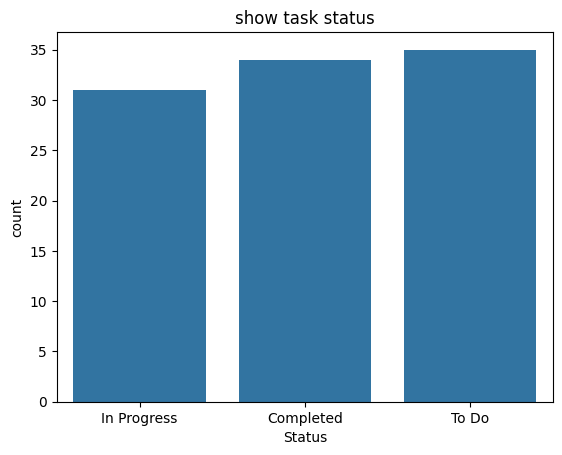

In [10]:
sns.countplot(x='Status',data=df)
plt.title("show task status")
plt.show()

In [11]:
# Priority=list(df['Priority'].value_counts().keys())        # CATAGORICAL
# Deadline=list(df['Deadline'].value_counts().values)  

In [12]:
# plt.bar(Priority,Deadline,color='green',lw=2,width=0.8)
# plt.xlabel(Priority)
# plt.ylabel(Deadline)
# plt.xticks(rotation=90)
# plt.show()

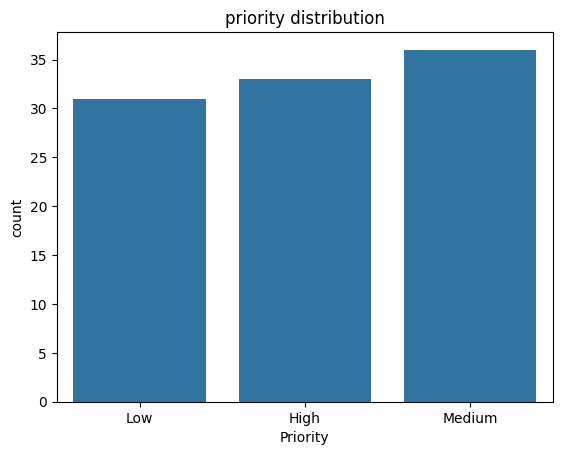

In [13]:
sns.countplot(x='Priority',data=df)
plt.title("priority distribution")
plt.show()

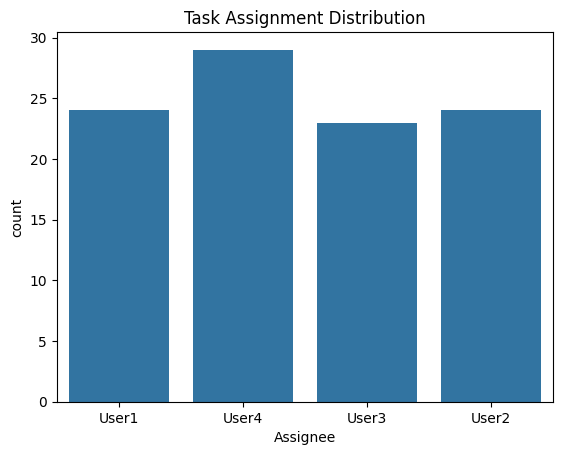

In [14]:
sns.countplot(x='Assignee', data=df)
plt.title('Task Assignment Distribution')
plt.show()


In [15]:
duplicates=df[df.duplicated()]
duplicates

,Task ID,Task Name,Description,Priority,Deadline,Status,Assignee,Time Taken (hrs)


In [16]:
df.drop_duplicates(inplace=True)
df.shape

(100, 8)

In [17]:
df['Assignee'].fillna('Unassigned', inplace=True)
df['Description'].fillna('No Description', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9312\4020413469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Assignee'].fillna('Unassigned', inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_9312\4020413469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [18]:
df['Deadline'].fillna(pd.to_datetime('2023-12-31'),inplace=True)
df['Deadline']=pd.to_datetime(df['Deadline'])

C:\Users\hp\AppData\Local\Temp\ipykernel_9312\1898176109.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Deadline'].fillna(pd.to_datetime('2023-12-31'),inplace=True)


In [19]:
print(df.isnull().sum())
print(df.head())

Task ID             0
Task Name           0
Description         0
Priority            0
Deadline            0
Status              0
Assignee            0
Time Taken (hrs)    0
dtype: int64
   Task ID Task Name            Description Priority  \
0        1    Task 1  Description of task 1      Low   
1        2    Task 2  Description of task 2     High   
2        3    Task 3  Description of task 3      Low   
3        4    Task 4  Description of task 4      Low   
4        5    Task 5  Description of task 5     High   

                    Deadline       Status Assignee  Time Taken (hrs)  
0 2025-04-05 15:39:26.474201  In Progress    User1                 1  
1 2025-01-22 15:39:26.474201    Completed    User4                 9  
2 2025-04-08 15:39:26.474201        To Do    User4                 6  
3 2025-02-09 15:39:26.474201        To Do    User4                 7  
4 2025-05-02 15:39:26.474201        To Do    User4                 7  


In [20]:
df['Overdue'] = df['Deadline'] < pd.to_datetime('today')
df['Days Until Deadline'] = (df['Deadline'] - pd.to_datetime('today')).dt.days
df.head()

,Task ID,Task Name,Description,Priority,Deadline,Status,Assignee,Time Taken (hrs),Overdue,Days Until Deadline
0,1,Task 1,Description of task 1,Low,2025-04-05 15:39:26.474201,In Progress,User1,1,True,-46
1,2,Task 2,Description of task 2,High,2025-01-22 15:39:26.474201,Completed,User4,9,True,-119
2,3,Task 3,Description of task 3,Low,2025-04-08 15:39:26.474201,To Do,User4,6,True,-43
3,4,Task 4,Description of task 4,Low,2025-02-09 15:39:26.474201,To Do,User4,7,True,-101
4,5,Task 5,Description of task 5,High,2025-05-02 15:39:26.474201,To Do,User4,7,True,-19


### nlp

In [21]:
import nltk
import os

In [22]:
nltk_path="/tmp/nltk_data"
os.makedirs(nltk_path,exist_ok=True)

In [23]:
nltk.download('punkt', download_dir=nltk_path)
nltk.download('stopwords', download_dir=nltk_path)

[nltk_data] Downloading package punkt to /tmp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /tmp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
nltk.data.path.append(nltk_path)

In [25]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

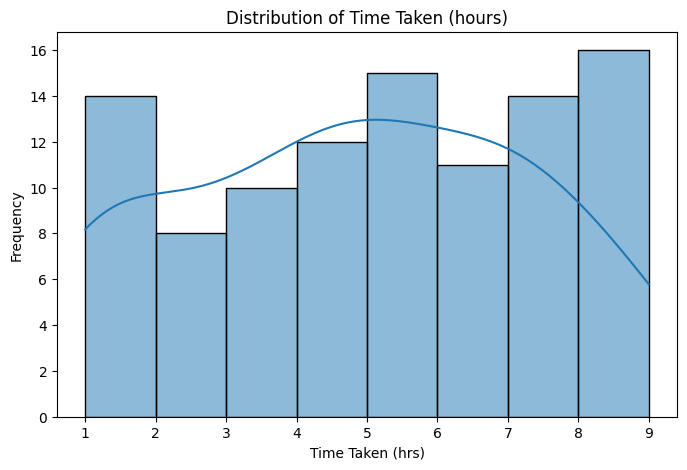

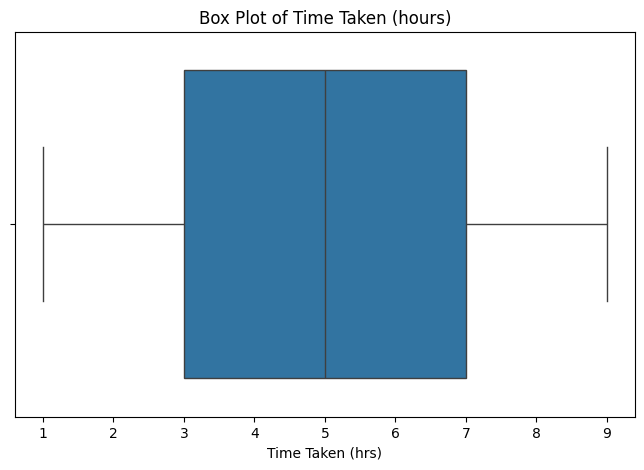

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Time Taken (hrs)'], kde=True)
plt.title('Distribution of Time Taken (hours)')
plt.xlabel('Time Taken (hrs)')
plt.ylabel('Frequency')
plt.show()

# Visualize time taken using box plot to identify quartiles and outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Time Taken (hrs)'])
plt.title('Box Plot of Time Taken (hours)')
plt.xlabel('Time Taken (hrs)')
plt.show()

In [26]:
stop_words = set(stopwords.words('english'))
porter_stemmer = PorterStemmer()

In [27]:
def preprocess_text(text):
    # 1. Convert text to lowercase
    text = text.lower()

    # 2. Tokenize the text
    tokens = word_tokenize(text)

    # 3. Filter tokens (keep alphabetic words and remove stopwords)
    filtered_tokens = [
        word for word in tokens
        if word.isalpha() and word not in stop_words
    ]

    # 4. Apply stemming
    stemmed_tokens = [porter_stemmer.stem(word) for word in filtered_tokens]

    # 5. Join the stemmed tokens back into a string
    return ' '.join(stemmed_tokens)

In [29]:
import nltk
import os

nltk_path = "/tmp/nltk_data"
os.makedirs(nltk_path, exist_ok=True)

nltk.download('punkt', download_dir=nltk_path)
nltk.download('stopwords', download_dir=nltk_path)
nltk.download('punkt_tab', download_dir=nltk_path)

nltk.data.path.append(nltk_path)


[nltk_data] Downloading package punkt to /tmp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /tmp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /tmp/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [30]:
# Apply NLP preprocessing function to 'Description' column
# Create new column 'Processed_Description' with cleaned and stemmed text
# Display original and processed descriptions for comparison
df['Processed_Description'] = df['Description'].apply(preprocess_text)
df[['Description', 'Processed_Description']].head()
# Perform TF-IDF feature extraction on processed text
# Limit features to 500 for manageability
# Fit and transform 'Processed_Description' to TF-IDF matrix and convert to dense array
# Print the TF-IDF feature names
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=500)
X_tfidf = tfidf_vectorizer.fit_transform(df['Processed_Description'])
X_tfidf_array = X_tfidf.toarray()

print(tfidf_vectorizer.get_feature_names_out())

# %%
# Prepare dataset for model training
# Create target variable 'Category' based on 'Overdue' status
# Split features and target into train and test sets (70% train, 30% test)
from sklearn.model_selection import train_test_split

df['Category'] = df['Overdue'].apply(lambda x: 'Overdue' if x else 'On Time')

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf_array, df['Category'], test_size=0.3, random_state=42
)

# %%
# Train and evaluate a Multinomial Naive Bayes classifier
# Print classification metrics and accuracy on the test set
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# %%
# Train and evaluate a Support Vector Machine (SVM) classifier with linear kernel
# Check if training data contains at least two classes (required for SVM)
# If so, train model and print classification report on test data
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

svm_model = SVC(kernel='linear')
unique_classes = np.unique(y_train)

if len(unique_classes) < 2:
    print(f"Skipping SVM training: Only one class found in training data: {unique_classes[0]}")
else:
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    print("SVM Classification Report:")
    print(classification_report(y_test, y_pred_svm))

# %%
# Display class distribution in the training set
print(y_train.value_counts())

# %%
# Display class distribution in the entire dataset
print(df['Category'].value_counts())

['descript' 'task']
Naive Bayes Classification Report:
              precision    recall  f1-score   support

     On Time       0.00      0.00      0.00        19
     Overdue       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.18      0.50      0.27        30
weighted avg       0.13      0.37      0.20        30

SVM Classification Report:
              precision    recall  f1-score   support

     On Time       0.00      0.00      0.00        19
     Overdue       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.18      0.50      0.27        30
weighted avg       0.13      0.37      0.20        30

Category
Overdue    39
On Time    31
Name: count, dtype: int64
Category
Overdue    50
On Time    50
Name: count, dtype: int64


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [31]:
# Prepare data for model training using relevant numerical and categorical features
# Create target variable 'Category' from 'Overdue' (already created earlier)
# Select features: numerical ('Time Taken (hrs)', 'Days Until Deadline') and categorical ('Priority', 'Status')
# Exclude non-predictive or text features
# Use ColumnTransformer to one-hot encode categorical features and pass numerical features as-is
# Fit and transform the feature set with this preprocessor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

y = df['Category']
features = ['Time Taken (hrs)', 'Priority', 'Status', 'Days Until Deadline']
X = df[features].copy()

categorical_features = ['Priority', 'Status']
numerical_features = ['Time Taken (hrs)', 'Days Until Deadline']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

# Split processed features and target into training and testing sets
# Use stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)

# Print shapes to verify data preparation
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Check class distribution in training data after stratified splitting
print("\nValue counts in y_train after splitting:")
print(y_train.value_counts())

# %%
# The Naive Bayes classifier is commented out because MultinomialNB cannot handle negative feature values
# which may occur in 'Days Until Deadline' or after encoding.
# Use other classifiers such as SVM instead.

# %%
# Train and evaluate Support Vector Machine (SVM) classifier using linear kernel
# Check that training data contains at least two classes before fitting the model
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = SVC(kernel='linear')
unique_classes = np.unique(y_train)

if len(unique_classes) < 2:
    print(f"Skipping SVM training: Only one class found in training data: {unique_classes[0]}")
else:
    svm_model.fit(X_train, y_train)

    y_pred_svm = svm_model.predict(X_test)

   
    print("SVM Classification Report:")
    print(classification_report(y_test, y_pred_svm))

Shape of X_train: (70, 8)
Shape of y_train: (70,)

Value counts in y_train after splitting:
Category
Overdue    35
On Time    35
Name: count, dtype: int64
SVM Classification Report:
              precision    recall  f1-score   support

     On Time       0.94      1.00      0.97        15
     Overdue       1.00      0.93      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [32]:
# Import classification_report to evaluate model performance
# Print the classification report for SVM predictions on the test set
# Specify target names to make the report easier to interpret ("On Time" and "Overdue")
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm, target_names=["On Time", "Overdue"]))

              precision    recall  f1-score   support

     On Time       0.94      1.00      0.97        15
     Overdue       1.00      0.93      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [33]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Calculate accuracy, precision, and recall for SVM predictions
# Specify 'Overdue' as the positive class label for precision and recall calculations
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, pos_label='Overdue')
recall = recall_score(y_test, y_pred_svm, pos_label='Overdue')

# Print the evaluation metrics with 4 decimal places
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9667
Precision: 1.0000
Recall: 0.9333


In [35]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Calculate evaluation metrics for the SVM model predictions
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, pos_label='Overdue')  # Specify positive class
recall = recall_score(y_test, y_pred_svm, pos_label='Overdue')

# Create a DataFrame summarizing the SVM model's performance metrics
# You can expand this DataFrame later to include other models for comparison
results = pd.DataFrame({
    'Model': ['SVM (Processed Features)'],  # Model name
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall]
})
print(results)

                      Model  Accuracy  Precision    Recall
0  SVM (Processed Features)  0.966667        1.0  0.933333
